In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 첫 5행 출력
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
df['전출지별'].unique()

array(['전출지별', '전국', nan, '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [5]:
df['전입지별'].unique()

array(['전입지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [6]:
# nan NaN 결측치 -- 데이터 없음
# ==> 처리방법
# 1. 제거 - 데이터가 충분해서 해당 결측치 데이터를 삭제해도 충분할 때.
# 2. 대처
    # 단순실수로 누락되어서 뻔히 어떤값인지 알 수 있을 때
    # 결측치가 전체데이터 대비 적다... 대략 15% 미만이고, 데이터가 적어서 살려야 할 때 - 평균,표준편차,빈도수 등 다양하게 채움
    # 보간기법이라 함 ==> 자체 머신러닝을 이용해서 해당 부분의 값을 예측



# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()  #ffill forward fill  #bfill back fill :뒤에 있는 데이터로 채울때
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
#한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

<Axes: >

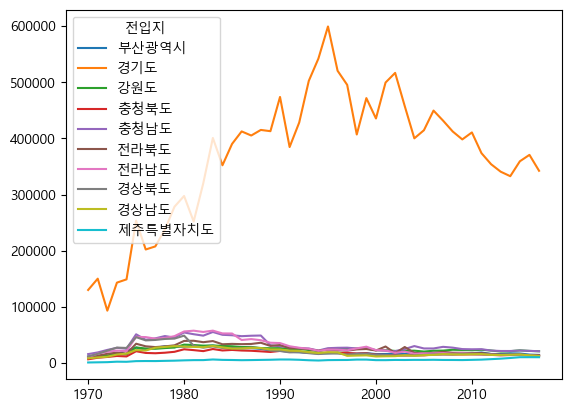

In [8]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
# print (df_seoul.head())
df_seoul = df_seoul.drop(['전출지별'], axis=1)  #전출지가 서울로 모두 동일하므로 삭제
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)   #전업지별 이름을 전입지로 변경
df_seoul = df_seoul.set_index('전입지')  #인덱스 숫자로 나온것을 전입지가 인덱스로 오도록 변경
df_seoul = df_seoul.drop(index = ['전국'])
df_seoul.T.plot()

<Axes: >

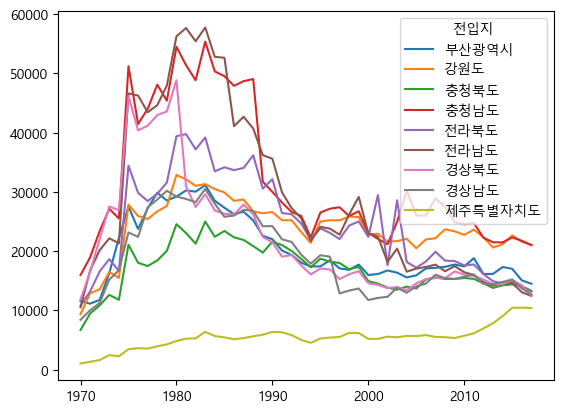

In [9]:
#경기도 데이터 삭제
df_seoul.T.drop(columns=['경기도']).plot()

<Axes: >

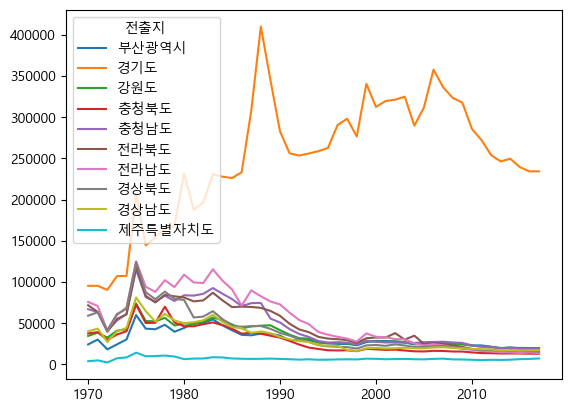

In [10]:
# 다른지역에서 서울로 이동한 데이터 
mask2 = (df['전출지별'] != '서울특별시') & (df['전입지별'] == '서울특별시') 
df_seoul2 = df[mask2]
df_seoul2 = df_seoul2.drop(columns=['전입지별'])
df_seoul2 = df_seoul2.rename(columns = {'전출지별':'전출지'})   #전출지별 이름을 전출지로 변경
df_seoul2 = df_seoul2.set_index('전출지')  #인덱스 숫자로 나온것을 전출지가 인덱스로 오도록 변경
df_seoul2 = df_seoul2.drop (index=['전국'])
# df_seoul2.head()


#시각화
# df_seoul2 = df_seoul2.T  #인덱스가 X축이므로, X축이 지역(전출지)으로 나오기 때문에, 연도를 X축으로 하기 위해서 .T 전치해줌.
df_seoul2.T.plot()    #컬럼이 범례  / 인덱스와 컬럼 교차의 값이 Y축




<Axes: >

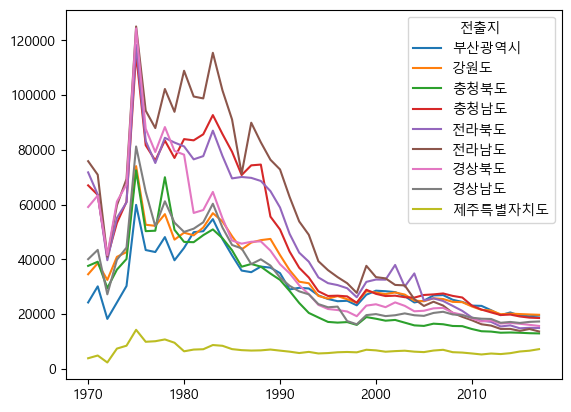

In [11]:
#경기도 데이터 삭제
df_seoul2.T.drop(columns=['경기도']).plot()

In [12]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

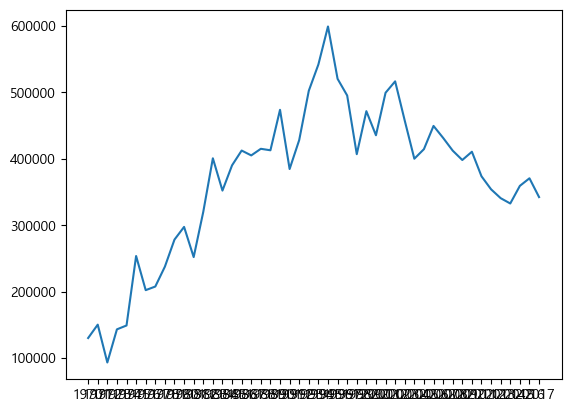

In [13]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

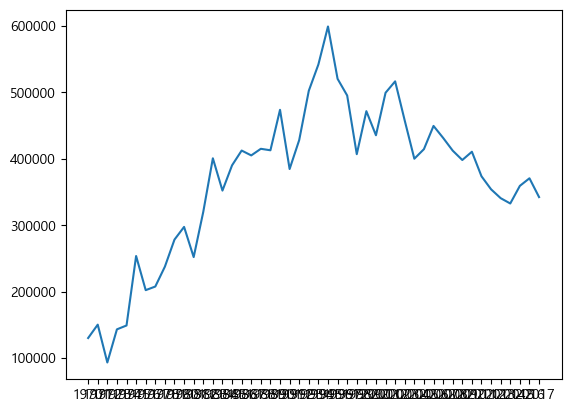

In [14]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)
plt.show()

응용

In [15]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [16]:
#구글드라이브 공유 파일 열기

import gdown

file_id = '1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'credits.csv'

gdown.download(url,output,quiet=False)
df = pd.read_csv(output)
df.head(10)

#installments 할부개월수
#day_of_week 월요일 0  ~ 일요일 6
#holyday 1이면 공휴일, 0이면 공휴일이 아님



Downloading...
From (original): https://drive.google.com/uc?id=1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7
From (redirected): https://drive.google.com/uc?id=1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7&confirm=t&uuid=df20449e-c8dc-440a-8996-a4c652192eff
To: d:\0python_SNC\15pandas\pandas-data-analysis-main\part4\credits.csv
100%|██████████| 150M/150M [00:08<00:00, 18.3MB/s] 


,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
5,0,2016-12-19,13:36:39,30b1422f77,44,NaN,0,0
6,0,2016-12-19,14:00:23,6dd8dad5ab,146,NaN,0,0
7,0,2016-12-19,14:01:36,a4a425c5d2,6,NaN,0,0
8,0,2016-12-19,14:09:46,f213c011fe,306,NaN,0,0
9,0,2016-12-19,14:13:02,a185b7b11f,51,NaN,0,0


In [17]:
#date를 연도, 월별로 나누어서 새로운 컬럼 year, month에 기재
df['date'].dtype #==> dtype('O') object
#데이터가 날짜인데, 문자열형태. 즉 object이면,
#datetime으로 형식을 변경해서 년 월 일을 분리할 수 있다.
df['datetime']=pd.to_datetime(df.date)
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,datetime,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12-14,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016-12-14,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016-12-19,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016-12-19,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016-12-19,2016,12


<Axes: xlabel='year'>

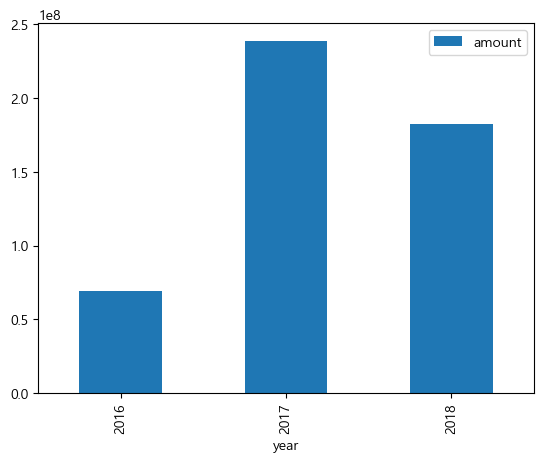

In [26]:
#연도별 신용카드 매출액을 구해서 출력
df.amount.dtype  #출력 dtype('int64')

credit2=df.groupby("year", observed=True)[['amount']].sum()

credit2.plot.bar()



In [27]:
credit2.index = credit2.index.astype('str')

In [28]:
credit2

,amount
year,
2016,69385560
2017,238703895
2018,182751998


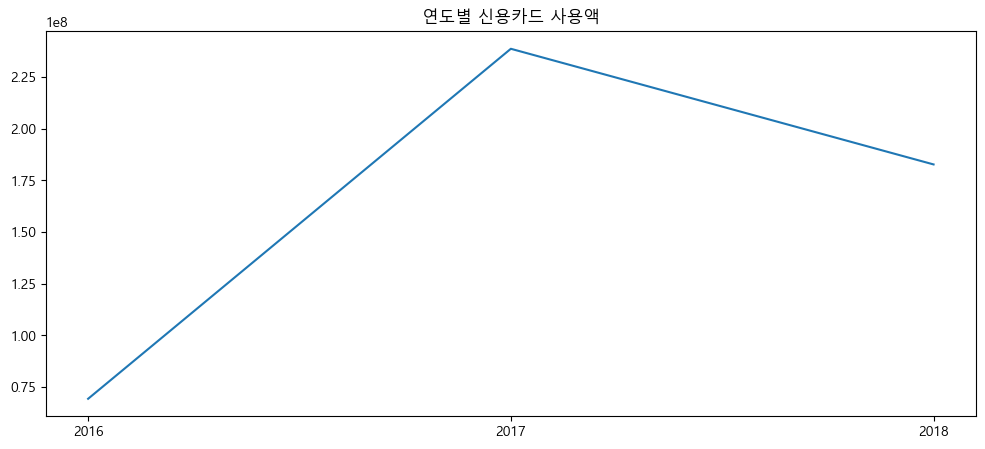

In [29]:
plt.figure(figsize = (12,5))
plt.title ('연도별 신용카드 사용액')
plt.plot(credit2.index, credit2.amount)
#credit2.plot()
plt.show()